<div style="text-align: center">
    <h1>Infinite Skills &mdash; Intro to Python with IPython Notebook</h1>
    <h2>Project: Visualizing Stock Ticker Data</h2>
    <h2>James Powell &mdash; <a href="james@pythonquants.com">james@pythonquants.com</a></h2>
</div>

In [1]:
from IPython.display import IFrame, display
from __future__ import division, unicode_literals

In [2]:
IFrame('http://www.infiniteskills.com', width='100%', height=250)

Agenda 
------

Project: Visualizing Stock Ticker Data
    
[Problem: description](#description)

[Quandl](#quandl)

[Data Basics: JSON](#json)

[Anaconda Basics: installing packages (`requests`) with `conda`](#conda)

[Python Basics: using `requests`](#requests)

[Python Basics: objects & methods, dir, help](#objects)

[Python Basics: comparison operations](#comparisons)

[Python Basics: keyword arguments](#kwargs)

[Python Basics: dictionaries](#types)

[Python Basics: traversing structures](#dict)

[Python Basics: `date`, `datetime`, `timedelta`](#datetime)

[Python Basics: using `pandas`](#pandas)

[Python Basics: `DataFrame.date` vs `DataFrame['date']`](#columns)

[Python Basics: `DataFrame[x].apply`](#apply)

[Python Basics: `DataFrame.plot`](#plot)

[Python Basics: using `matplotlib`](#matplotlib)

[Project: visualizing MSFT ticker data](#project)

In [ ]:
from IPython.display import Javascript, display
display(Javascript('''IPython.notebook.kernel.execute("filename = '" + IPython.notebook.notebook_name + "'");'''))

In [ ]:
from json import load
with open(filename) as f:
    nb = load(f)

headings = [line for cell in nb['worksheets'][0]['cells']
                     if cell['cell_type'] == 'markdown' and any(line.strip().startswith('Agenda') 
                                                                for line in cell['source'])
                 for line in cell['source'] 
                     if '#' in line]

for heading in headings:
    if heading:
        title, anchor = heading.strip()[1:-1].split('](')
        print '<h2 id="{anchor}">{title}</h2>'.format(title=title, anchor=anchor[1:])

<h2 id="description">Problem: description</h2>

Download ticker data for some commonly traded US stocks, manipulate this data using pandas, and plot the data.

In [ ]:
IFrame('http://finance.google.com', width='100%', height=250)

<h2 id="quandl">Quandl</h2>

In [ ]:
IFrame('http://quandl.com', width='100%', height=250)

<h2 id="json">JSON</h2>

In [ ]:
IFrame('https://en.wikipedia.org/wiki/Json', width='100%', height=500)

In [ ]:
from IPython.display import Javascript
Javascript('''IPython.notebook.kernel.execute("filename = '" + IPython.notebook.notebook_name + "'");''')

In [ ]:
print filename

In [ ]:
with open(filename) as f:
    for line in f.readlines()[0:5]:
        print line

In [ ]:
from json import dumps
dumps([1,2,3, ['four', 'five', 'six'], True, False, None])

In [ ]:
from json import loads
loads('[100, 200, 300, true, false, null]')

<h2 id="conda">Anaconda Basics: installing packages (`requests`) with `conda`</h2>

In [ ]:
IFrame('http://conda.pydata.org/docs/faq.html', width='100%', height=350)

In [ ]:
#! conda list

In [ ]:
#! conda install requests

In [ ]:
import requests

<h2 id="requests">Python Basics: using `requests`</h2>

In [ ]:
from requests import get
url = 'http://www.quandl.com/api/v1/datasets/GOOG/NASDAQ_MSFT.json?trim_start=1986-03-13&trim_end=2014-08-22'
response = get(url)
response

In [ ]:
response.json()

<h2 id="objects">Python Basics: objects & methods, `dir`, `help`</h2>

In [ ]:
len([1,2,3,4])

In [ ]:
sum([1,2,3,4])

In [ ]:
'infinite skills'.title()

In [ ]:
xs = []
xs.append(2)
xs

In [ ]:
help(get)

In [ ]:
get?

In [ ]:
dir(response)

In [ ]:
help(response.json)

In [ ]:
response.json?

<h2 id="#comparisons">Python Basics: comparison operations</h2>

In [ ]:
x = 100

print 'x == 100', x == 100
print 'x > 9', x > 9
print 'x < 999', x < 999
print 'x >= 100', x >= 100
print 'x <= 1000', x <= 1000

print
print '100 == x', 100 == x
print '9 < x', 9 < x
print '999 > x', 999 > x
print '100 <= x', 100 <= x
print '1000 >= x', 1000 >= x

print '9 < x and x < 999', 9 < x and x < 999
print '9 < x < 999', 9 < x < 999

In [ ]:
print "'asdf' > 'asd'", 'asdf' > 'asd'
print "'bsdf' > 'asdf'", 'bsdf' > 'asdf'
print "not ('asdf' > 'asdfg')", not ('asdf' > 'asdfg')

In [ ]:
print "(1,2) > (1,2,3)", (1,2) > (1,2,3)

In [ ]:
from sys import version_info
version_info

In [ ]:
print version_info > (2,6,5)

In [ ]:
print version_info >= (3,0,0)

<h2 id="#kwargs">Python Basics: keyword arguments</h2>

In [ ]:
def greeting(title, lastname):
    print 'Hello,', title, lastname

In [ ]:
greeting('Mrs.', 'Robinson')

In [ ]:
def greeting(lastname, title='Mrs.'):
    print 'Hello,', title, lastname    

In [ ]:
greeting('Robinson')

In [ ]:
greeting('Kotter', 'Mr.')

In [ ]:
greeting('Kotter', title='Mr.')

In [ ]:
greeting(title='Mr.', lastname='Kotter')

<h2 id="#types">Python Basics: dictionaries</h2>

In [ ]:
english = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
spanish = ['cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve', 'diez']

print 'In English, you say:', english[3]
print 'In Spanish, you say:', spanish[3]

In [ ]:
number = 'seven'
idx = english.index(number)
print spanish[idx]

In [ ]:
en_sp = {
    'zero':  'cero',
    'one':   'uno',
    'two':   'dos',
    'three': 'tres',
    'four':  'cuatro',
    'five':  'cinco',
    'six':   'seis',
    'seven': 'siete',
    'eight': 'ocho',
    'nine':  'nueve',
    'ten':   'diez',
}
en_sp

In [ ]:
en_sp['seven']

In [ ]:
en_sp['siete']

In [ ]:
en_sp.keys()

In [ ]:
en_sp.values()

In [ ]:
en_sp.items()

In [ ]:
for en, sp in en_sp.items():
    print 'In English, you say:', en
    print 'In Spanish, you say:', sp
    print

In [ ]:
en_sp['eleven'] = 'onze'

In [ ]:
en_sp['eleven']

In [ ]:
en_sp['eleven'] = 'once'

In [ ]:
en_sp['eleven']

In [ ]:
en_sp['doce'] = 'twelve'

In [ ]:
en_sp

In [ ]:
del en_sp['doce']
en_sp['twelve'] = 'doce'

In [ ]:
en_sp

In [ ]:
from requests import get
url = 'http://www.zompist.com/numbers.htm'
response = get(url)
content = response.content

In [ ]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(content)

In [ ]:
english = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']

dictionaries = {}
for group in bs.find_all('tr'):
    language = group.find_all('td')[0].text
    numbers = []
    for td in group.find_all('td')[1:]:
        numbers.append(td.text)
    dictionaries[language] = {}
    for en, num in zip(english, numbers):
        dictionaries[language][en] = num        

In [ ]:
dictionaries.keys()

In [ ]:
dictionaries['French']

In [ ]:
print dictionaries['German']['eight']

<h2 id="#dict">Python Basics: traversing structures</h2>

In [ ]:
from IPython.display import Javascript
Javascript('''IPython.notebook.kernel.execute("filename = '" + IPython.notebook.notebook_name + "'");''')

In [ ]:
filename

In [ ]:
from json import load

with open(filename) as f:
    notebook = load(f)
    
notebook

In [ ]:
type(notebook)

In [ ]:
notebook['worksheets']

In [ ]:
notebook['worksheets'][0]

In [ ]:
notebook['worksheets'][0]['cells']

In [ ]:
notebook['worksheets'][0]['cells'][15]

<h2 id="datetime">Python Basics: `date`, `datetime`, `timedelta`</h2>

In [ ]:
from datetime import date

new_years = date(2000,1,1)
dir(new_years)

In [ ]:
new_years.year

In [ ]:
new_years.weekday()

In [ ]:
date(2000,2,29)

In [ ]:
date(1999,2,29)

In [ ]:
halloween = date(2000,10,31)

In [ ]:
halloween == new_years

In [ ]:
halloween > new_years

In [ ]:
halloween + new_years

In [ ]:
halloween - new_years

In [ ]:
from datetime import timedelta
new_years + timedelta(days = 7)

In [ ]:
from datetime import datetime
datetime(1999,12,31,23,59,59)

In [ ]:
datetime(2000,1,1) - timedelta(microseconds=1)

<h2 id="#pandas">Python Basics: using `pandas`</h2>

In [ ]:
IFrame('http://pandas.pydata.org/', width='100%', height=250)

In [ ]:
from pandas import DataFrame

df = DataFrame(range(10), columns=['x'])
df

In [ ]:
df['y'] = range(10,20)
df

In [ ]:
df['z'] = df['x'] + df['y']
df

<h2 id="#columns">Python Basics: `DataFrame.date` vs `DataFrame['date']`</h2>

In [ ]:
df['y']

In [ ]:
df.y

In [ ]:
df.iloc[0]

In [ ]:
df.loc[0]

In [ ]:
from string import ascii_lowercase

df.index = list(ascii_lowercase[:len(df)])
df

In [ ]:
df.iloc[1]

In [ ]:
df.loc['b']

<h2 id="#apply">Python Basics: `DataFrame[x].apply`</h2>

In [ ]:
from numpy import linspace

linspace(0,10,num=9)

In [ ]:
linspace(0,10,num=9)

In [ ]:
from pandas import DataFrame
from numpy import linspace
from math import pi, sin

df = DataFrame(linspace(-2*pi, 2*pi, 1001), columns=['x'])
df['y'] = df['x'].apply(sin)
df.head()

In [ ]:
df.iloc[500]

<h2 id="#plot">Python Basics: `DataFrame.plot`</h2>

In [ ]:
%matplotlib inline

In [ ]:
from pandas import DataFrame
from numpy import linspace, pi, cos, sin

df = DataFrame(linspace(-2*pi, 2*pi, 1001), columns=['x'])
df['y'] = cos(df['x'])
df['z'] = sin(df['x'])
df['y'].plot()
df['x'].plot()
df['z'].plot()

In [ ]:
df.index = df['x']
df.drop('x', axis=1, inplace=True)
df.plot()

In [ ]:
from pandas import DataFrame
from numpy import linspace, log
from scipy.misc import factorial

df = DataFrame(index=linspace(0,100,1000)[1:])

df['constant']     = 1
df['linear']       = linspace(0,100,1000)[1:]
df['quadratic']    = df['linear'] ** 2
df['cubic']        = df['linear'] ** 3
df['logarithmic']  = log(df['linear'])
df['linearithmic'] = df['linear'] * log(df['linear'])
df['factorial']    = factorial(df['linear'])
df['exponential']  = 2 ** df['linear']

df.head()

In [ ]:
df.plot()

In [ ]:
df[['linearithmic', 'logarithmic', 'linear']].plot()

In [ ]:
df[:2.5].plot()

<h2 id="#matplotlib">Python Basics: using `matplotlib`</h2>

In [ ]:
from pandas import DataFrame
from numpy import linspace, log
from scipy.misc import factorial

df = DataFrame(index=linspace(0,100,1000)[1:])

df['constant']     = 1
df['linear']       = linspace(0,100,1000)[1:]
df['quadratic']    = df['linear'] ** 2
df['cubic']        = df['linear'] ** 3
df['logarithmic']  = log(df['linear'])
df['linearithmic'] = df['linear'] * log(df['linear'])
df['factorial']    = factorial(df['linear'])
df['exponential']  = 2 ** df['linear']

df.head()

In [ ]:
from matplotlib.pyplot import plot, axes

plot(df.index, df['logarithmic'], 'g-', label='logarithmic')
plot(df.index, df['linear'],      'b-', label='linear')

axes().set_ylim((0,50))
axes().set_xlim((0,20))
axes().legend(loc='upper right')

In [ ]:
from matplotlib.pyplot import subplots

fig, axes = subplots(nrows=1, ncols=2, figsize=(30,10))

axes[0].plot(df.index, df['logarithmic'], 'g-', label='logarithmic')
axes[0].plot(df.index, df['linear'],      'b-', label='linear')
axes[0].legend(loc='center right')

axes[1].plot(df.index, df['linearithmic'], 'g-', label='linearithmic')
axes[1].plot(df.index, df['linear'],       'b-', label='linear')
axes[1].legend(loc='center right')

<h2 id="#project">Project: visualizing MSFT ticker data</h2>

In [1]:
%matplotlib inline

In [4]:
from requests import get
url = 'http://www.quandl.com/api/v1/datasets/GOOG/NASDAQ_MSFT.json?trim_start=1986-03-13&trim_end=2014-08-22&order=asc'
response = get(url)
response

<Response [200]>

In [5]:
print response.json().keys()

[u'column_names', u'code', u'source_name', u'name', u'display_url', u'urlize_name', u'data', u'updated_at', u'private', u'from_date', u'errors', u'frequency', u'to_date', u'premium', u'source_code', u'type', u'id', u'description']


In [6]:
response.json()['data'][0]

[u'1986-03-13', 0.0, None, None, 0.1, 30758400.0]

In [9]:
from pandas import DataFrame

json = response.json()
df = DataFrame(json['data'], columns=json['column_names'])
df.index = df.Date
df.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
1986-03-13,1986-03-13,0,NaN,NaN,0.1,30758400
1986-03-14,1986-03-14,0,NaN,NaN,0.1,7852896
1986-03-17,1986-03-17,0,NaN,NaN,0.1,33036768
1986-03-18,1986-03-18,0,NaN,NaN,0.1,66403296
1986-03-19,1986-03-19,0,NaN,NaN,0.1,47846304


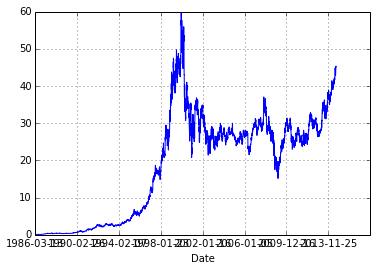

In [10]:
df['Close'].plot()

In [11]:
df.iloc[0]

Date       1986-03-13
Open                0
High              NaN
Low               NaN
Close             0.1
Volume    3.07584e+07
Name: 1986-03-13, dtype: object

In [12]:
df.index

Index([u'1986-03-13', u'1986-03-14', u'1986-03-17', u'1986-03-18', u'1986-03-19', u'1986-03-20', u'1986-03-21', u'1986-03-24', u'1986-03-25', u'1986-03-26', u'1986-03-27', u'1986-03-31', u'1986-04-01', u'1986-04-02', u'1986-04-03', u'1986-04-04', u'1986-04-07', u'1986-04-08', u'1986-04-09', u'1986-04-10', u'1986-04-11', u'1986-04-14', u'1986-04-15', u'1986-04-16', u'1986-04-17', u'1986-04-18', u'1986-04-21', u'1986-04-22', u'1986-04-23', u'1986-04-24', u'1986-04-25', u'1986-04-28', u'1986-04-29', u'1986-04-30', u'1986-05-01', u'1986-05-02', u'1986-05-05', u'1986-05-06', u'1986-05-07', u'1986-05-08', u'1986-05-09', u'1986-05-12', u'1986-05-13', u'1986-05-14', u'1986-05-15', u'1986-05-16', u'1986-05-19', u'1986-05-20', u'1986-05-21', u'1986-05-22', u'1986-05-23', u'1986-05-27', u'1986-05-28', u'1986-05-29', u'1986-05-30', u'1986-06-02', u'1986-06-03', u'1986-06-04', u'1986-06-05', u'1986-06-06', u'1986-06-09', u'1986-06-10', u'1986-06-11', u'1986-06-12', u'1986-06-13', u'1986-06-16', u'1

In [13]:
from dateutil.parser import parse

df.index = df['Date'].apply(parse)

In [14]:
df.index

<class 'pandas.tseries.index.DatetimeIndex'>
[1986-03-13, ..., 2014-08-22]
Length: 7187, Freq: None, Timezone: None

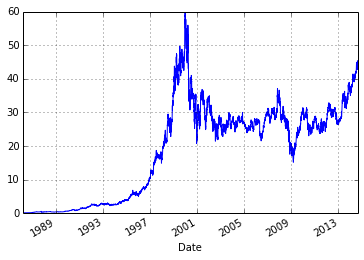

In [15]:
df['Close'].plot()

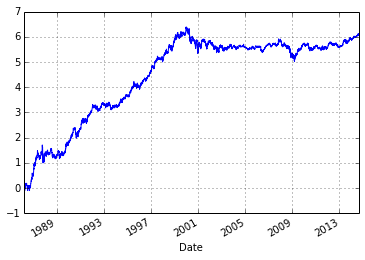

In [16]:
from numpy import log

df['Returns'] = log(df['Close'] / df['Close'].shift(1)).cumsum()
df['Returns'].plot()

$$log(x) + log(y) =  log(x y)$$

$$log(x) - log(y) =  log(\frac{x}{y})$$

$$log(\frac{t_{1}}{t_{0}}) + log(\frac{t_{2}}{t_{1}}) + \ldots  + log(\frac{t_{n}}{t_{n-1}})$$

$$log(t_{1}) - log(t_{0}) + log(t_{2}) - log(t_{1}) + \ldots  + log(t_{n}) - log(t_{n-1})$$

$$log(t_{n}) - log(t_{0})$$

$$log(\frac{t_{n}}{t_{0}})$$

In [19]:
IFrame('http://en.wikipedia.org/wiki/Timeline_of_Microsoft_Windows', width='100%', height=500)

In [24]:
from dateutil.parser import parse

win95 = parse('24 August 1995')
win98 = parse('25 June 1998')
win2k = parse('17 February 2000')

In [26]:
from datetime import date
parse('24 August 1995').date() == date(1995,8,24)

True

In [27]:
win95

datetime.datetime(1995, 8, 24, 0, 0)

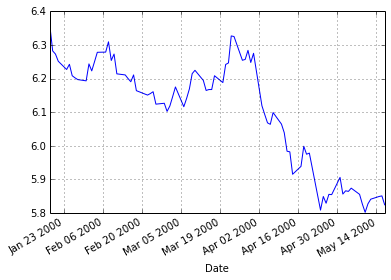

In [32]:
from datetime import timedelta

from_dt = win2k - timedelta(days=30)
to_dt   = win2k + timedelta(days=90)

df[from_dt:to_dt]['Returns'].plot()

In [33]:
from requests import get
from pandas import DataFrame
from dateutil.parser import parse
from numpy import log

url = 'http://www.quandl.com/api/v1/datasets/YAHOO/INDEX_GSPC.json?trim_start=1950-01-03&trim_end=2014-08-22&order=asc'
response = get(url)
sp500_df = DataFrame(response.json()['data'], columns=response.json()['column_names'])
sp500_df.index = sp500_df.Date.apply(parse)
sp500_df['Returns'] = log(sp500_df['Close'] / sp500_df['Close'].shift(1)).cumsum()
sp500_df.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close,Returns
Date,,,,,,,,
1950-01-03,1950-01-03,16.66,16.66,16.66,16.66,1260000,16.66,NaN
1950-01-04,1950-01-04,16.85,16.85,16.85,16.85,1890000,16.85,0.011340
1950-01-05,1950-01-05,16.93,16.93,16.93,16.93,2550000,16.93,0.016077
1950-01-06,1950-01-06,16.98,16.98,16.98,16.98,2010000,16.98,0.019026
1950-01-09,1950-01-09,17.08,17.08,17.08,17.08,2520000,17.08,0.024898


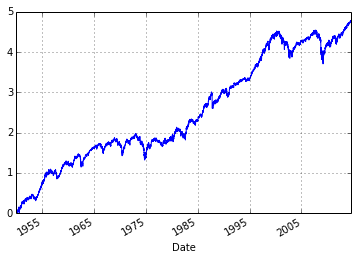

In [34]:
sp500_df['Returns'].plot()

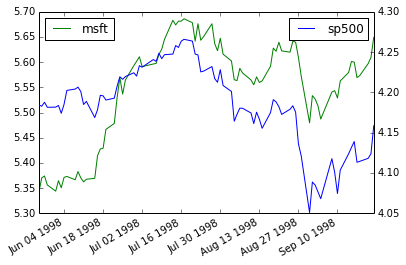

In [36]:
from matplotlib.pyplot import figure, plot_date
from datetime import timedelta

from_dt = win98 - timedelta(days=30)
to_dt   = win98 + timedelta(days=90)

fig = figure()
plot_date(df[from_dt:to_dt].index, df[from_dt:to_dt]['Returns'], 'g-', label='msft', figure=fig)

twin = fig.axes[0].twinx()
twin.plot_date(sp500_df[from_dt:to_dt].index, sp500_df[from_dt:to_dt]['Returns'], 'b-', label='sp500')

fig.axes[0].legend(loc='upper left')
twin.legend(loc='upper right')

fig.autofmt_xdate()

In [37]:
IFrame('https://en.wikipedia.org/wiki/Timeline_of_Apple_Inc._products', width='100%', height=300)

In [38]:
from requests import get
from pandas import DataFrame
from dateutil.parser import parse
from numpy import log

iphone = parse('June 29 2007')
ipad   = parse('April 30 2010')

url = 'http://www.quandl.com/api/v1/datasets/GOOG/NASDAQ_AAPL.json?trim_start=1980-12-12&trim_end=2014-08-22&order=asc'
response = get(url)
aapl_df = DataFrame(response.json()['data'], columns=response.json()['column_names'])
aapl_df.index = aapl_df.Date.apply(parse)
aapl_df['Returns'] = log(aapl_df['Close'] / aapl_df['Close'].shift(1)).cumsum()
aapl_df.head()

,Date,Open,High,Low,Close,Volume,Returns
Date,,,,,,,
1980-12-12,1980-12-12,0,4.12,4.11,4.11,14657300,NaN
1980-12-15,1980-12-15,0,3.91,3.89,3.89,5496400,-0.055014
1980-12-16,1980-12-16,0,3.62,3.61,3.61,3304000,-0.129715
1980-12-17,1980-12-17,0,3.71,3.70,3.70,2701300,-0.105090
1980-12-18,1980-12-18,0,3.82,3.80,3.80,2295300,-0.078422


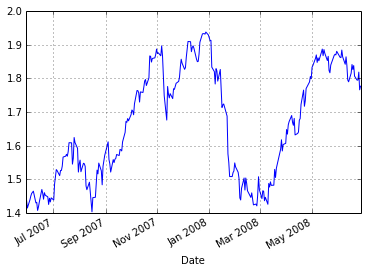

In [39]:
from matplotlib.pyplot import figure, plot_date
from datetime import timedelta

from_dt = ipad - timedelta(days=30)
to_dt   = iphone + timedelta(days=365)

aapl_df[from_dt:to_dt]['Returns'].plot()